In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import os
import pickle
import sys
from scipy import sparse
from pandas.api.types import CategoricalDtype

# show all columns and all column content
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pool_names = ['BTC/USDC', 'ETH/USDC', 'YFI/USDC', 'DOT/USDC', 'SNX/USDC',
            'LINK/USDC', 'AAVE/USDC', 'SUSHI/USDC', 'COMP/USDC', 'REN/USDC',
            'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 'MKR/USDC', 'CREAM/USDC',
            'GRT/USDC', 'ALPHA/USDC', 'FTT/USDC']


In [2]:
def hued_lineplot(df: pd.DataFrame, column_1: str, column_2: str, hued_column: str,
                  labels: list, xlabel: str, ylabel: str, title: str, 
                  color_set: str='Set1', xsize: int=30, ysize: int=15,
                  is_grid_required: bool=False):
    """Hued lineplot

    Args:
        df (pd.DataFrame): data to plot
        column_1 (str): x axis column
        column_2 (str): y axis column
        hued_column (str): column based on which hue will be performed
        labels (list): categories based on which hue will be done
        xlabel (str): x axis name
        ylabel (str): y axis name
        title (str): name of the chart
        color_set (str, optional): color set chosen for plotting lines. Defaults to 'Set1'.
        xsize (int, optional): x size of chart. Defaults to 30.
        ysize (int, optional): y size of chart. Defaults to 15.
        is_grid_required (bool, optional): is grid of the chart required. Defaults to False
    """
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    rgb_values = sns.color_palette(color_set, len(labels))
    color_map = dict(zip(labels, rgb_values))
    
    for label in labels:
        ax.plot(df[df[hued_column] == label][column_1], df[df[hued_column] == label][column_2],
                color=color_map[label], label=label)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.grid(is_grid_required)
    plt.show()

In [3]:
overall_history_list = []
for amm_name in pool_names:
    amm_history = pd.read_csv('' + amm_name.split('/')[0].lower() + '_usdc_indexed_position.csv')
    print('amm ' + amm_name + ' has ' + str(len(amm_history[(amm_history['position_size_after'] == 0) &
                                                           (amm_history['exchanged_position_size'] != 0)])) + 
                                                ' closes')
    
    overall_history_list.append(amm_history)
    
opens_closes_positions_df = pd.concat(overall_history_list)
opens_closes_positions_df['timestamp'] = pd.to_datetime(opens_closes_positions_df['timestamp'])

amm BTC/USDC has 34253 closes
amm ETH/USDC has 44866 closes
amm YFI/USDC has 64003 closes
amm DOT/USDC has 82901 closes
amm SNX/USDC has 94867 closes
amm LINK/USDC has 65534 closes
amm AAVE/USDC has 78000 closes
amm SUSHI/USDC has 94437 closes
amm COMP/USDC has 72679 closes
amm REN/USDC has 89550 closes
amm PERP/USDC has 83685 closes
amm UNI/USDC has 55174 closes
amm CRV/USDC has 93346 closes
amm MKR/USDC has 47335 closes
amm CREAM/USDC has 61454 closes
amm GRT/USDC has 72325 closes
amm ALPHA/USDC has 56656 closes
amm FTT/USDC has 39502 closes


# Time analysis of the position changes

In [4]:
opens_closes_positions_df.drop(columns=['Unnamed: 0'], inplace=True)
opens_closes_positions_df

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id,open_id
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd6787fd665f3b9bf001ad88e-20,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.552446e+03,1.665734e+04,8.727098e-01,16.657338,8.727098e-01,0.000000e+00,0.000000,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC,0.0,1.0
1,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c6265f11595c4c293a697-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.111460e+04,1.668646e+04,8.711866e-01,16.686462,1.743896e+00,0.000000e+00,58.249669,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC,0.0,1.0
2,0xea81e16520eae51395b4627365487daa2013df876ef3e38254579d1d149b17fd-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000e+00,3.334380e+04,-1.743896e+00,33.343800,0.000000e+00,-1.782200e-14,0.000000,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0,1.0
3,0xcbc30cda2cff5814702d67c67530f6598a670ad990f3875e8e314c564279df13-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.555467e+03,1.666640e+04,8.722351e-01,16.666402,8.722351e-01,0.000000e+00,0.000000,0.0,0.0,19141.103310,0.000000,13511238,2020-12-14 07:23:25,BTC/USDC,16.0,2.0
4,0xb7f635c0407feb60d7386e18b0d102503e5c9f034be9791bd961f75d22aceb69-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.112383e+04,1.670391e+04,8.702764e-01,16.703914,1.742512e+00,0.000000e+00,75.042344,0.0,0.0,19227.363807,-0.395807,13512310,2020-12-14 08:53:25,BTC/USDC,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301908,0x46558498bb5962a524f0b63d724d92777bb17b504e44441415f66ecdd6b4fa3f-12,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,3.690119e+03,2.154072e+03,5.000000e+01,2.154072,3.000000e+02,0.000000e+00,-0.785120,0.0,0.0,43.091241,0.000000,21019327,2022-03-09 11:41:00,FTT/USDC,0.0,1.0
301909,0x3ddf503cacc2125a68cc17a9b84e2971d6242423eea0175b6a7a93bd2bd82b80-13,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,1.100000e-17,1.286891e+04,-3.000000e+02,12.868911,-1.000000e-18,-4.650566e+01,0.000000,0.0,0.0,42.837940,-1.905190,21021513,2022-03-09 14:54:15,FTT/USDC,0.0,1.0
301910,0x4215d5f56936f1604171ada50922c0e5af609369ea109981b0f9cd8d925662bc-25,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,0.000000e+00,4.300000e-17,1.000000e-18,0.000000,0.000000e+00,-2.000000e-18,0.000000,0.0,0.0,42.869642,0.000000,21021523,2022-03-09 14:55:10,FTT/USDC,0.0,1.0
301911,0x507dae82675d33cc29766b5792ef6c527149ac4ddae469e5a9ead2e606ec9c80-8,0xa84daa76815f6d2cf99e406bd693e8588bc36dbe,0x838b322610bd99a449091d3bf3fba60d794909a9,1.000000e+00,1.500000e+00,3.664475e-02,0.001500,3.664475e-02,0.000000e+00,0.000000,0.0,0.0,40.933570,0.000000,21061399,2022-03-12 00:22:55,FTT/USDC,1231736.0,1.0


In [5]:
opens_closes_positions_df.reset_index(inplace=True)
opens_closes_positions_df

,index,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id,open_id
0,0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd6787fd665f3b9bf001ad88e-20,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.552446e+03,1.665734e+04,8.727098e-01,16.657338,8.727098e-01,0.000000e+00,0.000000,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC,0.0,1.0
1,1,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c6265f11595c4c293a697-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.111460e+04,1.668646e+04,8.711866e-01,16.686462,1.743896e+00,0.000000e+00,58.249669,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC,0.0,1.0
2,2,0xea81e16520eae51395b4627365487daa2013df876ef3e38254579d1d149b17fd-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000e+00,3.334380e+04,-1.743896e+00,33.343800,0.000000e+00,-1.782200e-14,0.000000,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0,1.0
3,3,0xcbc30cda2cff5814702d67c67530f6598a670ad990f3875e8e314c564279df13-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.555467e+03,1.666640e+04,8.722351e-01,16.666402,8.722351e-01,0.000000e+00,0.000000,0.0,0.0,19141.103310,0.000000,13511238,2020-12-14 07:23:25,BTC/USDC,16.0,2.0
4,4,0xb7f635c0407feb60d7386e18b0d102503e5c9f034be9791bd961f75d22aceb69-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.112383e+04,1.670391e+04,8.702764e-01,16.703914,1.742512e+00,0.000000e+00,75.042344,0.0,0.0,19227.363807,-0.395807,13512310,2020-12-14 08:53:25,BTC/USDC,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341945,301908,0x46558498bb5962a524f0b63d724d92777bb17b504e44441415f66ecdd6b4fa3f-12,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,3.690119e+03,2.154072e+03,5.000000e+01,2.154072,3.000000e+02,0.000000e+00,-0.785120,0.0,0.0,43.091241,0.000000,21019327,2022-03-09 11:41:00,FTT/USDC,0.0,1.0
9341946,301909,0x3ddf503cacc2125a68cc17a9b84e2971d6242423eea0175b6a7a93bd2bd82b80-13,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,1.100000e-17,1.286891e+04,-3.000000e+02,12.868911,-1.000000e-18,-4.650566e+01,0.000000,0.0,0.0,42.837940,-1.905190,21021513,2022-03-09 14:54:15,FTT/USDC,0.0,1.0
9341947,301910,0x4215d5f56936f1604171ada50922c0e5af609369ea109981b0f9cd8d925662bc-25,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,0.000000e+00,4.300000e-17,1.000000e-18,0.000000,0.000000e+00,-2.000000e-18,0.000000,0.0,0.0,42.869642,0.000000,21021523,2022-03-09 14:55:10,FTT/USDC,0.0,1.0
9341948,301911,0x507dae82675d33cc29766b5792ef6c527149ac4ddae469e5a9ead2e606ec9c80-8,0xa84daa76815f6d2cf99e406bd693e8588bc36dbe,0x838b322610bd99a449091d3bf3fba60d794909a9,1.000000e+00,1.500000e+00,3.664475e-02,0.001500,3.664475e-02,0.000000e+00,0.000000,0.0,0.0,40.933570,0.000000,21061399,2022-03-12 00:22:55,FTT/USDC,1231736.0,1.0


In [6]:
opens_closes_positions_df.drop(columns=['index'], inplace=True)

In [7]:
%%time
opens_closes_positions_df['passed_time_from_last_action'] = np.zeros(len(opens_closes_positions_df))

for amm in opens_closes_positions_df['amm_name'].unique():
    amm_positions_df = opens_closes_positions_df[opens_closes_positions_df['amm_name'] == amm]
    for trader in amm_positions_df['trader'].unique():
        reviewed_trader_activity = amm_positions_df[amm_positions_df['trader'] == trader]
        opens_closes_positions_df.loc[reviewed_trader_activity.index, 
                                      'passed_time_from_last_action'] = (reviewed_trader_activity['timestamp'] - 
                                                                         reviewed_trader_activity['timestamp'].shift(1))
    
opens_closes_positions_df

Wall time: 1h 34min 54s


,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id,open_id,passed_time_from_last_action
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd6787fd665f3b9bf001ad88e-20,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.552446e+03,1.665734e+04,8.727098e-01,16.657338,8.727098e-01,0.000000e+00,0.000000,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC,0.0,1.0,NaT
1,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c6265f11595c4c293a697-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.111460e+04,1.668646e+04,8.711866e-01,16.686462,1.743896e+00,0.000000e+00,58.249669,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC,0.0,1.0,0 days 00:55:40
2,0xea81e16520eae51395b4627365487daa2013df876ef3e38254579d1d149b17fd-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000e+00,3.334380e+04,-1.743896e+00,33.343800,0.000000e+00,-1.782200e-14,0.000000,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0,1.0,0 days 00:04:45
3,0xcbc30cda2cff5814702d67c67530f6598a670ad990f3875e8e314c564279df13-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.555467e+03,1.666640e+04,8.722351e-01,16.666402,8.722351e-01,0.000000e+00,0.000000,0.0,0.0,19141.103310,0.000000,13511238,2020-12-14 07:23:25,BTC/USDC,16.0,2.0,0 days 03:06:55
4,0xb7f635c0407feb60d7386e18b0d102503e5c9f034be9791bd961f75d22aceb69-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.112383e+04,1.670391e+04,8.702764e-01,16.703914,1.742512e+00,0.000000e+00,75.042344,0.0,0.0,19227.363807,-0.395807,13512310,2020-12-14 08:53:25,BTC/USDC,0.0,2.0,0 days 01:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341945,0x46558498bb5962a524f0b63d724d92777bb17b504e44441415f66ecdd6b4fa3f-12,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,3.690119e+03,2.154072e+03,5.000000e+01,2.154072,3.000000e+02,0.000000e+00,-0.785120,0.0,0.0,43.091241,0.000000,21019327,2022-03-09 11:41:00,FTT/USDC,0.0,1.0,0 days 00:01:50
9341946,0x3ddf503cacc2125a68cc17a9b84e2971d6242423eea0175b6a7a93bd2bd82b80-13,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,1.100000e-17,1.286891e+04,-3.000000e+02,12.868911,-1.000000e-18,-4.650566e+01,0.000000,0.0,0.0,42.837940,-1.905190,21021513,2022-03-09 14:54:15,FTT/USDC,0.0,1.0,0 days 03:13:15
9341947,0x4215d5f56936f1604171ada50922c0e5af609369ea109981b0f9cd8d925662bc-25,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,0.000000e+00,4.300000e-17,1.000000e-18,0.000000,0.000000e+00,-2.000000e-18,0.000000,0.0,0.0,42.869642,0.000000,21021523,2022-03-09 14:55:10,FTT/USDC,0.0,1.0,0 days 00:00:55
9341948,0x507dae82675d33cc29766b5792ef6c527149ac4ddae469e5a9ead2e606ec9c80-8,0xa84daa76815f6d2cf99e406bd693e8588bc36dbe,0x838b322610bd99a449091d3bf3fba60d794909a9,1.000000e+00,1.500000e+00,3.664475e-02,0.001500,3.664475e-02,0.000000e+00,0.000000,0.0,0.0,40.933570,0.000000,21061399,2022-03-12 00:22:55,FTT/USDC,1231736.0,1.0,NaT


In [8]:
time_related_info = opens_closes_positions_df[['id', 'trader', 'amm_name', 'timestamp', 
                                               'open_id', 'passed_time_from_last_action']]
time_related_info.to_csv('time_info_position_updates.csv')

In [9]:
time_related_info['seconds_passed_from_last_action'] = time_related_info[
                                                       'passed_time_from_last_action'].apply(lambda record: record.seconds)
time_related_info.to_csv('time_info_position_updates.csv')

<ipython-input-9-b1140f3aa154>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_related_info['seconds_passed_from_last_action'] = time_related_info[


# Distribution of time window between updates (in seconds)

Interesting observation is that there are values that look too similar to the case of bots activity because of time window between updates. General distribution shows that there is a great number of updates with time interval smaller than 1000 seconds, while overall situation demonstrates great windows between updates. Interesting moment is that in case of reviewing only records with time window smaller than 500 seconds there is clearly seen that most of updates have window smaller than 1 minute and that there is an anomalous rise of records count with window around 60 seconds.

Another interesting moment is that in case of looking only at records with time window smaller than 60 seconds most of the records have window with integer result of division by 5, which looks too suspicious.

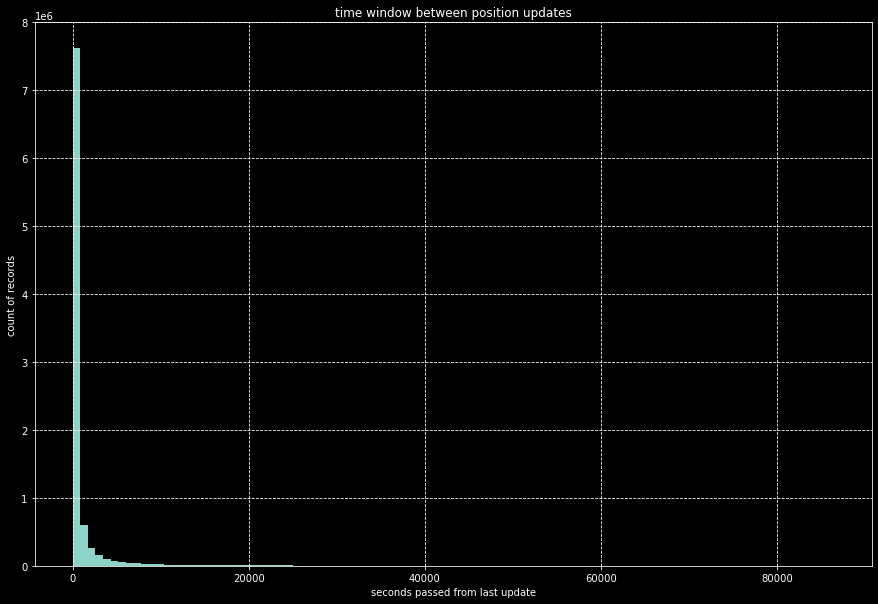

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(time_related_info['seconds_passed_from_last_action'], bins=100)
ax.set_xlabel("seconds passed from last update")
ax.set_ylabel("count of records")
ax.set_title("time window between position updates")
ax.grid(True, linestyle='--')
plt.show()

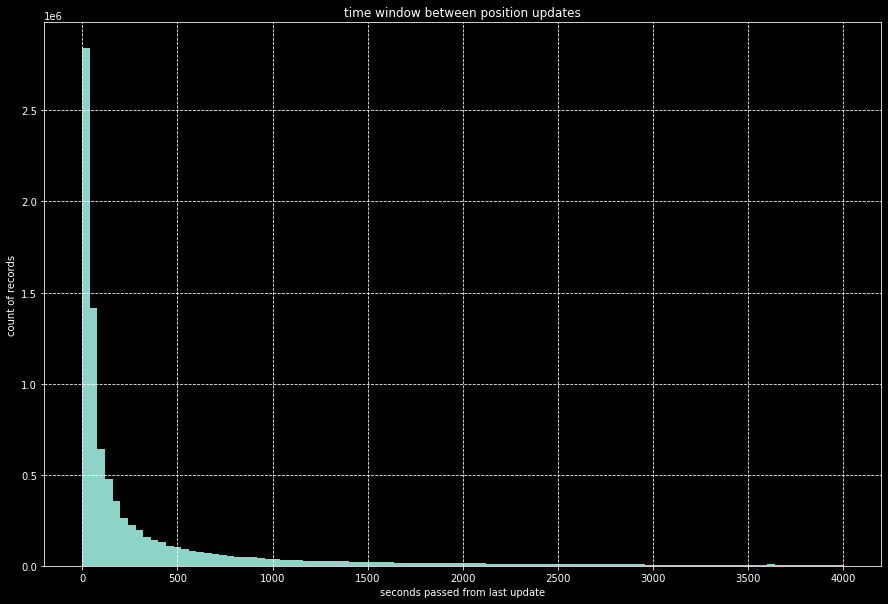

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(time_related_info[time_related_info["seconds_passed_from_last_action"] < 4000
                         ]['seconds_passed_from_last_action'], bins=100)
ax.set_xlabel("seconds passed from last update")
ax.set_ylabel("count of records")
ax.set_title("time window between position updates")
ax.grid(True, linestyle='--')
plt.show()

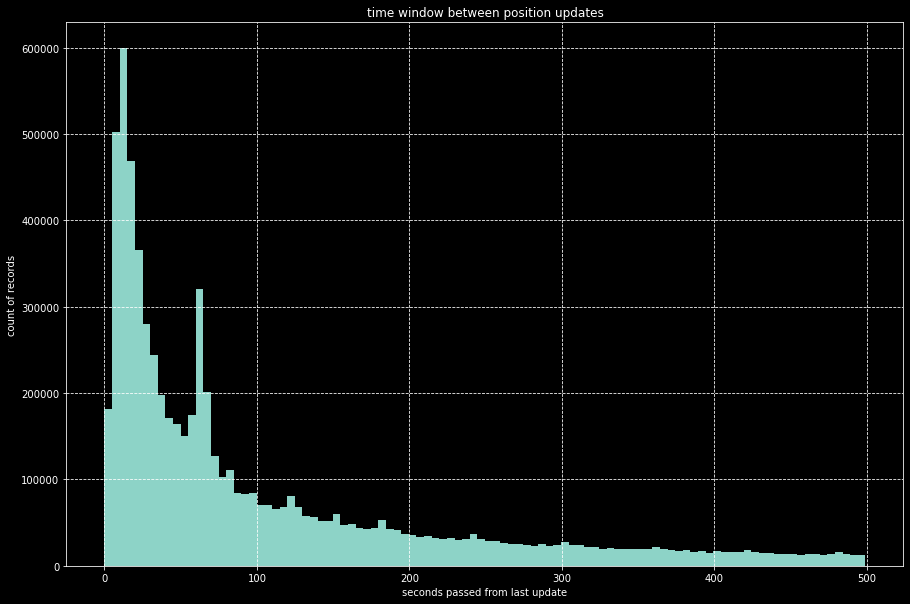

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(time_related_info[time_related_info["seconds_passed_from_last_action"] < 500
                         ]['seconds_passed_from_last_action'], bins=100)
ax.set_xlabel("seconds passed from last update")
ax.set_ylabel("count of records")
ax.set_title("time window between position updates")
ax.grid(True, linestyle='--')
plt.show()

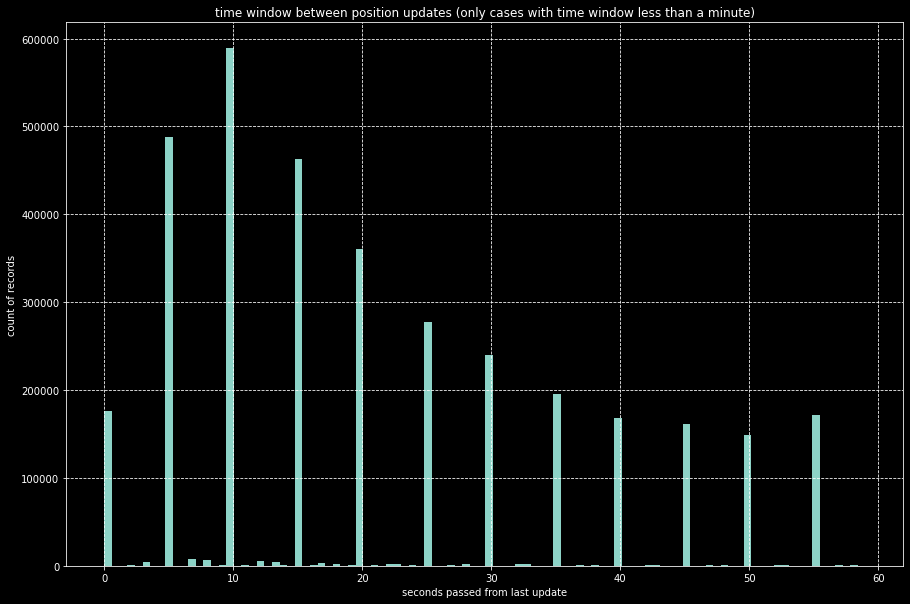

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(time_related_info[time_related_info["seconds_passed_from_last_action"] < 60
                         ]['seconds_passed_from_last_action'], bins=100)
ax.set_xlabel("seconds passed from last update")
ax.set_ylabel("count of records")
ax.set_title("time window between position updates (only cases with time window less than a minute)")
ax.grid(True, linestyle='--')
plt.show()

# Getting bots

In [14]:
amm_trader_list = []

for amm in opens_closes_positions_df['amm_name'].unique():
    amm_story = opens_closes_positions_df[opens_closes_positions_df['amm_name'] == amm]
    amm_trader_df = pd.DataFrame(columns=['amm', 'trader'])
    amm_trader_df['trader'] = amm_story['trader'].unique()
    amm_trader_df['amm'] = [amm] * len(amm_story['trader'].unique())
    amm_trader_list.append(amm_trader_df)
    
traders_amm_df = pd.concat(amm_trader_list)
traders_amm_df["count"] = [1] * len(traders_amm_df)
traders_amm_df

,amm,trader,count
0,BTC/USDC,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,1
1,BTC/USDC,0x9602686bf53a17baed60c48ba34ed4219a532381,1
2,BTC/USDC,0x43bd90e4cc93d6e40580507102cc7b1bc8a25284,1
3,BTC/USDC,0x5bea7caa02142ba59885466757e1112819731f09,1
4,BTC/USDC,0x069a67b8f965d02d095be12ae55e31e769692df4,1
...,...,...,...
561,FTT/USDC,0xc0f872a7127bdc6d98af04899d1a1d22376c7b6b,1
562,FTT/USDC,0x419df1d41f84de3d3854a4e6d0b4d772ebd1b13b,1
563,FTT/USDC,0xb39885f302643a5f96f743c3621d628dc3f72ce6,1
564,FTT/USDC,0xa84daa76815f6d2cf99e406bd693e8588bc36dbe,1


In [15]:
users = traders_amm_df["trader"].unique()
amms = traders_amm_df["amm"].unique()
shape = (len(users), len(amms))

user_cat = CategoricalDtype(categories=sorted(users), ordered=True)
amms_cat = CategoricalDtype(categories=sorted(amms), ordered=True)

user_index = traders_amm_df["trader"].astype(user_cat).cat.codes
amm_index = traders_amm_df["amm"].astype(amms_cat).cat.codes

# Conversion via COO matrix
coo = sparse.coo_matrix((traders_amm_df["count"], (user_index, amm_index)), shape=shape)
csr = coo.tocsr()

In [16]:
stats_df = pd.DataFrame.sparse.from_spmatrix(csr, columns=amms_cat.categories)
stats_df.index = user_cat.categories
stats_df['occurencies_sum'] = stats_df.sum(axis=1)
stats_df

,AAVE/USDC,ALPHA/USDC,BTC/USDC,COMP/USDC,CREAM/USDC,CRV/USDC,DOT/USDC,ETH/USDC,FTT/USDC,GRT/USDC,LINK/USDC,MKR/USDC,PERP/USDC,REN/USDC,SNX/USDC,SUSHI/USDC,UNI/USDC,YFI/USDC,occurencies_sum
0x000000003b0371b33aba8b6b58154a98d54695ad,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
0x000000064730640b7d670408d74280924883064f,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
0x0000000813b34008a225de08a6a61835508c71f9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0x000000ea89990a17ec07a35ac2bbb02214c50152,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,17
0x0000ce08fa224696a819877070bf378e8b131acf,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xffe694afb3b54ee0add6ded4cc0f9917777f13da,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
0xfffb40347816873ca038756cc87bc610144166b2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
0xfffe45d946f1f715dc0252df3db22a9edfaf5738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [17]:
entire_perpetual_traders_df = stats_df[stats_df['occurencies_sum'] == 18]
bots_positions_df = opens_closes_positions_df[opens_closes_positions_df['trader'].isin(entire_perpetual_traders_df.index)]

# Check values of records that have time window smaller than 70 seconds

In [18]:
opens_closes_positions_df['custom_position_capitalization'] = (opens_closes_positions_df['position_size_after'] *
                                                               opens_closes_positions_df['spot_price'])
opens_closes_positions_df['seconds_passed_from_last_action'] = opens_closes_positions_df[
                                                        'passed_time_from_last_action'].apply(lambda record: record.seconds)

In [19]:
len(opens_closes_positions_df[opens_closes_positions_df['seconds_passed_from_last_action'] < 65]['trader'].unique())

5395

In [20]:
len(opens_closes_positions_df[(opens_closes_positions_df['seconds_passed_from_last_action'] < 65) &
                             (opens_closes_positions_df['seconds_passed_from_last_action'] % 5 == 0)]['trader'].unique())

5260

In [21]:
bots_positions_df

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id,open_id,passed_time_from_last_action
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd6787fd665f3b9bf001ad88e-20,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5552.445854,16657.337561,0.872710,16.657338,0.872710,0.000000e+00,0.000000,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC,0.0,1.0,NaT
1,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c6265f11595c4c293a697-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,11114.600000,16686.462439,0.871187,16.686462,1.743896,0.000000e+00,58.249669,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC,0.0,1.0,0 days 00:55:40
2,0xea81e16520eae51395b4627365487daa2013df876ef3e38254579d1d149b17fd-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000,33343.800000,-1.743896,33.343800,0.000000,-1.782200e-14,0.000000,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0,1.0,0 days 00:04:45
3,0xcbc30cda2cff5814702d67c67530f6598a670ad990f3875e8e314c564279df13-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5555.467426,16666.402278,0.872235,16.666402,0.872235,0.000000e+00,0.000000,0.0,0.0,19141.103310,0.000000,13511238,2020-12-14 07:23:25,BTC/USDC,16.0,2.0,0 days 03:06:55
4,0xb7f635c0407feb60d7386e18b0d102503e5c9f034be9791bd961f75d22aceb69-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,11123.834606,16703.914119,0.870276,16.703914,1.742512,0.000000e+00,75.042344,0.0,0.0,19227.363807,-0.395807,13512310,2020-12-14 08:53:25,BTC/USDC,0.0,2.0,0 days 01:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341825,0xf8f0aa46df36528c06fbde647fd41bc762d3f77e061384d0d17fac89f499a25b-20,0x884721e14f325b5861da34115b5262df0485d738,0x838b322610bd99a449091d3bf3fba60d794909a9,1015.063347,3045.190040,-80.649102,3.045190,-80.649102,0.000000e+00,0.000000,0.0,0.0,37.745533,0.000000,20313874,2022-01-26 19:15:00,FTT/USDC,1070949.0,5.0,1 days 22:28:30
9341826,0xbc3bf30cc9ca5da1e08cc3a2b67b8f630dbe009a5b7cbc82db64bcf7a946e3d9-9,0x884721e14f325b5861da34115b5262df0485d738,0x838b322610bd99a449091d3bf3fba60d794909a9,1017.290953,2031.270186,53.861489,2.031270,-26.787613,2.227607e+00,1.107884,0.0,0.0,37.721503,0.000000,20313880,2022-01-26 19:15:30,FTT/USDC,0.0,5.0,0 days 00:00:30
9341827,0x651fd60d346e2807c2611d605fc02be395296c37c281ca0cd513eac06e0c1e54-10,0x884721e14f325b5861da34115b5262df0485d738,0x838b322610bd99a449091d3bf3fba60d794909a9,0.000000,1010.584364,26.787613,1.010584,0.000000,1.107884e+00,0.000000,0.0,0.0,37.730115,0.000000,20313881,2022-01-26 19:15:35,FTT/USDC,0.0,5.0,0 days 00:00:05
9341828,0xf413f0d98bdfc354bce48bddc6d835a5c1f0ce3db07dcea926a1920516157a44-19,0x884721e14f325b5861da34115b5262df0485d738,0x838b322610bd99a449091d3bf3fba60d794909a9,1003.798178,3011.394535,-79.990466,3.011395,-79.990466,0.000000e+00,0.000000,0.0,0.0,37.634103,0.000000,20332027,2022-01-27 20:29:50,FTT/USDC,1078210.0,6.0,1 days 01:14:15


Interesting moment is that even with time intervals less that 65 seconds there are too many traders. Due to this moment it is not possible to be sure about bot nature of all traders with small time windows between updates. Most likely, traders that perform their activity.

Considering that time between updates until this moment was calculated for each amm separately it is required to review time between update by user independent from amm where he/she was operating at.

In [22]:
%%time
opens_closes_positions_df['passed_time_from_last_action'] = np.zeros(len(opens_closes_positions_df))

for amm in opens_closes_positions_df['amm_name'].unique():
    amm_positions_df = opens_closes_positions_df[opens_closes_positions_df['amm_name'] == amm]
    for trader in amm_positions_df['trader'].unique():
        reviewed_trader_activity = amm_positions_df[amm_positions_df['trader'] == trader]
        opens_closes_positions_df.loc[reviewed_trader_activity.index, 
                                      'passed_time_from_last_action'] = (reviewed_trader_activity['timestamp'] - 
                                                                        reviewed_trader_activity['timestamp'].shift(1))
        
opens_closes_positions_df

Wall time: 1h 37min 5s


,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id,open_id,passed_time_from_last_action,custom_position_capitalization,seconds_passed_from_last_action
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd6787fd665f3b9bf001ad88e-20,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.552446e+03,1.665734e+04,8.727098e-01,16.657338,8.727098e-01,0.000000e+00,0.000000,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC,0.0,1.0,NaT,1.668646e+04,NaN
1,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c6265f11595c4c293a697-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.111460e+04,1.668646e+04,8.711866e-01,16.686462,1.743896e+00,0.000000e+00,58.249669,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC,0.0,1.0,0 days 00:55:40,3.346050e+04,3340.0
2,0xea81e16520eae51395b4627365487daa2013df876ef3e38254579d1d149b17fd-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000e+00,3.334380e+04,-1.743896e+00,33.343800,0.000000e+00,-1.782200e-14,0.000000,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0,1.0,0 days 00:04:45,0.000000e+00,285.0
3,0xcbc30cda2cff5814702d67c67530f6598a670ad990f3875e8e314c564279df13-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5.555467e+03,1.666640e+04,8.722351e-01,16.666402,8.722351e-01,0.000000e+00,0.000000,0.0,0.0,19141.103310,0.000000,13511238,2020-12-14 07:23:25,BTC/USDC,16.0,2.0,0 days 03:06:55,1.669554e+04,11215.0
4,0xb7f635c0407feb60d7386e18b0d102503e5c9f034be9791bd961f75d22aceb69-6,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,1.112383e+04,1.670391e+04,8.702764e-01,16.703914,1.742512e+00,0.000000e+00,75.042344,0.0,0.0,19227.363807,-0.395807,13512310,2020-12-14 08:53:25,BTC/USDC,0.0,2.0,0 days 01:30:00,3.350390e+04,5400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341945,0x46558498bb5962a524f0b63d724d92777bb17b504e44441415f66ecdd6b4fa3f-12,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,3.690119e+03,2.154072e+03,5.000000e+01,2.154072,3.000000e+02,0.000000e+00,-0.785120,0.0,0.0,43.091241,0.000000,21019327,2022-03-09 11:41:00,FTT/USDC,0.0,1.0,0 days 00:01:50,1.292737e+04,110.0
9341946,0x3ddf503cacc2125a68cc17a9b84e2971d6242423eea0175b6a7a93bd2bd82b80-13,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,1.100000e-17,1.286891e+04,-3.000000e+02,12.868911,-1.000000e-18,-4.650566e+01,0.000000,0.0,0.0,42.837940,-1.905190,21021513,2022-03-09 14:54:15,FTT/USDC,0.0,1.0,0 days 03:13:15,-4.283794e-17,11595.0
9341947,0x4215d5f56936f1604171ada50922c0e5af609369ea109981b0f9cd8d925662bc-25,0xb39885f302643a5f96f743c3621d628dc3f72ce6,0x838b322610bd99a449091d3bf3fba60d794909a9,0.000000e+00,4.300000e-17,1.000000e-18,0.000000,0.000000e+00,-2.000000e-18,0.000000,0.0,0.0,42.869642,0.000000,21021523,2022-03-09 14:55:10,FTT/USDC,0.0,1.0,0 days 00:00:55,0.000000e+00,55.0
9341948,0x507dae82675d33cc29766b5792ef6c527149ac4ddae469e5a9ead2e606ec9c80-8,0xa84daa76815f6d2cf99e406bd693e8588bc36dbe,0x838b322610bd99a449091d3bf3fba60d794909a9,1.000000e+00,1.500000e+00,3.664475e-02,0.001500,3.664475e-02,0.000000e+00,0.000000,0.0,0.0,40.933570,0.000000,21061399,2022-03-12 00:22:55,FTT/USDC,1231736.0,1.0,NaT,1.500000e+00,NaN


In [23]:
%%time
opens_closes_positions_df['passed_time_from_any_last_action'] = np.zeros(len(opens_closes_positions_df))

cur_iteration = 0
total_iterations = len(opens_closes_positions_df['trader'].unique())

for trader in opens_closes_positions_df['trader'].unique():
    trader_positions_df = opens_closes_positions_df[opens_closes_positions_df['trader'] == trader]
    opens_closes_positions_df.loc[trader_positions_df.index, 
                                  'passed_time_from_any_last_action'] = (trader_positions_df['timestamp'] - 
                                                                        trader_positions_df['timestamp'].shift(1))
    cur_iteration += 1
    print("finished " + str(cur_iteration) + " iteration out of " + str(total_iterations))
    
opens_closes_positions_df['seconds_passed_from_any_last_action'] = opens_closes_positions_df[
                                                'passed_time_from_any_last_action'].apply(lambda record: record.seconds)

finished 1 iteration out of 10177
finished 2 iteration out of 10177
finished 3 iteration out of 10177
finished 4 iteration out of 10177
finished 5 iteration out of 10177
finished 6 iteration out of 10177
finished 7 iteration out of 10177
finished 8 iteration out of 10177
finished 9 iteration out of 10177
finished 10 iteration out of 10177
finished 11 iteration out of 10177
finished 12 iteration out of 10177
finished 13 iteration out of 10177
finished 14 iteration out of 10177
finished 15 iteration out of 10177
finished 16 iteration out of 10177
finished 17 iteration out of 10177
finished 18 iteration out of 10177
finished 19 iteration out of 10177
finished 20 iteration out of 10177
finished 21 iteration out of 10177
finished 22 iteration out of 10177
finished 23 iteration out of 10177
finished 24 iteration out of 10177
finished 25 iteration out of 10177
finished 26 iteration out of 10177
finished 27 iteration out of 10177
finished 28 iteration out of 10177
finished 29 iteration out of 

finished 232 iteration out of 10177
finished 233 iteration out of 10177
finished 234 iteration out of 10177
finished 235 iteration out of 10177
finished 236 iteration out of 10177
finished 237 iteration out of 10177
finished 238 iteration out of 10177
finished 239 iteration out of 10177
finished 240 iteration out of 10177
finished 241 iteration out of 10177
finished 242 iteration out of 10177
finished 243 iteration out of 10177
finished 244 iteration out of 10177
finished 245 iteration out of 10177
finished 246 iteration out of 10177
finished 247 iteration out of 10177
finished 248 iteration out of 10177
finished 249 iteration out of 10177
finished 250 iteration out of 10177
finished 251 iteration out of 10177
finished 252 iteration out of 10177
finished 253 iteration out of 10177
finished 254 iteration out of 10177
finished 255 iteration out of 10177
finished 256 iteration out of 10177
finished 257 iteration out of 10177
finished 258 iteration out of 10177
finished 259 iteration out o

finished 460 iteration out of 10177
finished 461 iteration out of 10177
finished 462 iteration out of 10177
finished 463 iteration out of 10177
finished 464 iteration out of 10177
finished 465 iteration out of 10177
finished 466 iteration out of 10177
finished 467 iteration out of 10177
finished 468 iteration out of 10177
finished 469 iteration out of 10177
finished 470 iteration out of 10177
finished 471 iteration out of 10177
finished 472 iteration out of 10177
finished 473 iteration out of 10177
finished 474 iteration out of 10177
finished 475 iteration out of 10177
finished 476 iteration out of 10177
finished 477 iteration out of 10177
finished 478 iteration out of 10177
finished 479 iteration out of 10177
finished 480 iteration out of 10177
finished 481 iteration out of 10177
finished 482 iteration out of 10177
finished 483 iteration out of 10177
finished 484 iteration out of 10177
finished 485 iteration out of 10177
finished 486 iteration out of 10177
finished 487 iteration out o

finished 688 iteration out of 10177
finished 689 iteration out of 10177
finished 690 iteration out of 10177
finished 691 iteration out of 10177
finished 692 iteration out of 10177
finished 693 iteration out of 10177
finished 694 iteration out of 10177
finished 695 iteration out of 10177
finished 696 iteration out of 10177
finished 697 iteration out of 10177
finished 698 iteration out of 10177
finished 699 iteration out of 10177
finished 700 iteration out of 10177
finished 701 iteration out of 10177
finished 702 iteration out of 10177
finished 703 iteration out of 10177
finished 704 iteration out of 10177
finished 705 iteration out of 10177
finished 706 iteration out of 10177
finished 707 iteration out of 10177
finished 708 iteration out of 10177
finished 709 iteration out of 10177
finished 710 iteration out of 10177
finished 711 iteration out of 10177
finished 712 iteration out of 10177
finished 713 iteration out of 10177
finished 714 iteration out of 10177
finished 715 iteration out o

finished 916 iteration out of 10177
finished 917 iteration out of 10177
finished 918 iteration out of 10177
finished 919 iteration out of 10177
finished 920 iteration out of 10177
finished 921 iteration out of 10177
finished 922 iteration out of 10177
finished 923 iteration out of 10177
finished 924 iteration out of 10177
finished 925 iteration out of 10177
finished 926 iteration out of 10177
finished 927 iteration out of 10177
finished 928 iteration out of 10177
finished 929 iteration out of 10177
finished 930 iteration out of 10177
finished 931 iteration out of 10177
finished 932 iteration out of 10177
finished 933 iteration out of 10177
finished 934 iteration out of 10177
finished 935 iteration out of 10177
finished 936 iteration out of 10177
finished 937 iteration out of 10177
finished 938 iteration out of 10177
finished 939 iteration out of 10177
finished 940 iteration out of 10177
finished 941 iteration out of 10177
finished 942 iteration out of 10177
finished 943 iteration out o

finished 1140 iteration out of 10177
finished 1141 iteration out of 10177
finished 1142 iteration out of 10177
finished 1143 iteration out of 10177
finished 1144 iteration out of 10177
finished 1145 iteration out of 10177
finished 1146 iteration out of 10177
finished 1147 iteration out of 10177
finished 1148 iteration out of 10177
finished 1149 iteration out of 10177
finished 1150 iteration out of 10177
finished 1151 iteration out of 10177
finished 1152 iteration out of 10177
finished 1153 iteration out of 10177
finished 1154 iteration out of 10177
finished 1155 iteration out of 10177
finished 1156 iteration out of 10177
finished 1157 iteration out of 10177
finished 1158 iteration out of 10177
finished 1159 iteration out of 10177
finished 1160 iteration out of 10177
finished 1161 iteration out of 10177
finished 1162 iteration out of 10177
finished 1163 iteration out of 10177
finished 1164 iteration out of 10177
finished 1165 iteration out of 10177
finished 1166 iteration out of 10177
f

finished 1362 iteration out of 10177
finished 1363 iteration out of 10177
finished 1364 iteration out of 10177
finished 1365 iteration out of 10177
finished 1366 iteration out of 10177
finished 1367 iteration out of 10177
finished 1368 iteration out of 10177
finished 1369 iteration out of 10177
finished 1370 iteration out of 10177
finished 1371 iteration out of 10177
finished 1372 iteration out of 10177
finished 1373 iteration out of 10177
finished 1374 iteration out of 10177
finished 1375 iteration out of 10177
finished 1376 iteration out of 10177
finished 1377 iteration out of 10177
finished 1378 iteration out of 10177
finished 1379 iteration out of 10177
finished 1380 iteration out of 10177
finished 1381 iteration out of 10177
finished 1382 iteration out of 10177
finished 1383 iteration out of 10177
finished 1384 iteration out of 10177
finished 1385 iteration out of 10177
finished 1386 iteration out of 10177
finished 1387 iteration out of 10177
finished 1388 iteration out of 10177
f

finished 1584 iteration out of 10177
finished 1585 iteration out of 10177
finished 1586 iteration out of 10177
finished 1587 iteration out of 10177
finished 1588 iteration out of 10177
finished 1589 iteration out of 10177
finished 1590 iteration out of 10177
finished 1591 iteration out of 10177
finished 1592 iteration out of 10177
finished 1593 iteration out of 10177
finished 1594 iteration out of 10177
finished 1595 iteration out of 10177
finished 1596 iteration out of 10177
finished 1597 iteration out of 10177
finished 1598 iteration out of 10177
finished 1599 iteration out of 10177
finished 1600 iteration out of 10177
finished 1601 iteration out of 10177
finished 1602 iteration out of 10177
finished 1603 iteration out of 10177
finished 1604 iteration out of 10177
finished 1605 iteration out of 10177
finished 1606 iteration out of 10177
finished 1607 iteration out of 10177
finished 1608 iteration out of 10177
finished 1609 iteration out of 10177
finished 1610 iteration out of 10177
f

finished 1806 iteration out of 10177
finished 1807 iteration out of 10177
finished 1808 iteration out of 10177
finished 1809 iteration out of 10177
finished 1810 iteration out of 10177
finished 1811 iteration out of 10177
finished 1812 iteration out of 10177
finished 1813 iteration out of 10177
finished 1814 iteration out of 10177
finished 1815 iteration out of 10177
finished 1816 iteration out of 10177
finished 1817 iteration out of 10177
finished 1818 iteration out of 10177
finished 1819 iteration out of 10177
finished 1820 iteration out of 10177
finished 1821 iteration out of 10177
finished 1822 iteration out of 10177
finished 1823 iteration out of 10177
finished 1824 iteration out of 10177
finished 1825 iteration out of 10177
finished 1826 iteration out of 10177
finished 1827 iteration out of 10177
finished 1828 iteration out of 10177
finished 1829 iteration out of 10177
finished 1830 iteration out of 10177
finished 1831 iteration out of 10177
finished 1832 iteration out of 10177
f

finished 2028 iteration out of 10177
finished 2029 iteration out of 10177
finished 2030 iteration out of 10177
finished 2031 iteration out of 10177
finished 2032 iteration out of 10177
finished 2033 iteration out of 10177
finished 2034 iteration out of 10177
finished 2035 iteration out of 10177
finished 2036 iteration out of 10177
finished 2037 iteration out of 10177
finished 2038 iteration out of 10177
finished 2039 iteration out of 10177
finished 2040 iteration out of 10177
finished 2041 iteration out of 10177
finished 2042 iteration out of 10177
finished 2043 iteration out of 10177
finished 2044 iteration out of 10177
finished 2045 iteration out of 10177
finished 2046 iteration out of 10177
finished 2047 iteration out of 10177
finished 2048 iteration out of 10177
finished 2049 iteration out of 10177
finished 2050 iteration out of 10177
finished 2051 iteration out of 10177
finished 2052 iteration out of 10177
finished 2053 iteration out of 10177
finished 2054 iteration out of 10177
f

finished 2250 iteration out of 10177
finished 2251 iteration out of 10177
finished 2252 iteration out of 10177
finished 2253 iteration out of 10177
finished 2254 iteration out of 10177
finished 2255 iteration out of 10177
finished 2256 iteration out of 10177
finished 2257 iteration out of 10177
finished 2258 iteration out of 10177
finished 2259 iteration out of 10177
finished 2260 iteration out of 10177
finished 2261 iteration out of 10177
finished 2262 iteration out of 10177
finished 2263 iteration out of 10177
finished 2264 iteration out of 10177
finished 2265 iteration out of 10177
finished 2266 iteration out of 10177
finished 2267 iteration out of 10177
finished 2268 iteration out of 10177
finished 2269 iteration out of 10177
finished 2270 iteration out of 10177
finished 2271 iteration out of 10177
finished 2272 iteration out of 10177
finished 2273 iteration out of 10177
finished 2274 iteration out of 10177
finished 2275 iteration out of 10177
finished 2276 iteration out of 10177
f

finished 2472 iteration out of 10177
finished 2473 iteration out of 10177
finished 2474 iteration out of 10177
finished 2475 iteration out of 10177
finished 2476 iteration out of 10177
finished 2477 iteration out of 10177
finished 2478 iteration out of 10177
finished 2479 iteration out of 10177
finished 2480 iteration out of 10177
finished 2481 iteration out of 10177
finished 2482 iteration out of 10177
finished 2483 iteration out of 10177
finished 2484 iteration out of 10177
finished 2485 iteration out of 10177
finished 2486 iteration out of 10177
finished 2487 iteration out of 10177
finished 2488 iteration out of 10177
finished 2489 iteration out of 10177
finished 2490 iteration out of 10177
finished 2491 iteration out of 10177
finished 2492 iteration out of 10177
finished 2493 iteration out of 10177
finished 2494 iteration out of 10177
finished 2495 iteration out of 10177
finished 2496 iteration out of 10177
finished 2497 iteration out of 10177
finished 2498 iteration out of 10177
f

finished 2694 iteration out of 10177
finished 2695 iteration out of 10177
finished 2696 iteration out of 10177
finished 2697 iteration out of 10177
finished 2698 iteration out of 10177
finished 2699 iteration out of 10177
finished 2700 iteration out of 10177
finished 2701 iteration out of 10177
finished 2702 iteration out of 10177
finished 2703 iteration out of 10177
finished 2704 iteration out of 10177
finished 2705 iteration out of 10177
finished 2706 iteration out of 10177
finished 2707 iteration out of 10177
finished 2708 iteration out of 10177
finished 2709 iteration out of 10177
finished 2710 iteration out of 10177
finished 2711 iteration out of 10177
finished 2712 iteration out of 10177
finished 2713 iteration out of 10177
finished 2714 iteration out of 10177
finished 2715 iteration out of 10177
finished 2716 iteration out of 10177
finished 2717 iteration out of 10177
finished 2718 iteration out of 10177
finished 2719 iteration out of 10177
finished 2720 iteration out of 10177
f

finished 2916 iteration out of 10177
finished 2917 iteration out of 10177
finished 2918 iteration out of 10177
finished 2919 iteration out of 10177
finished 2920 iteration out of 10177
finished 2921 iteration out of 10177
finished 2922 iteration out of 10177
finished 2923 iteration out of 10177
finished 2924 iteration out of 10177
finished 2925 iteration out of 10177
finished 2926 iteration out of 10177
finished 2927 iteration out of 10177
finished 2928 iteration out of 10177
finished 2929 iteration out of 10177
finished 2930 iteration out of 10177
finished 2931 iteration out of 10177
finished 2932 iteration out of 10177
finished 2933 iteration out of 10177
finished 2934 iteration out of 10177
finished 2935 iteration out of 10177
finished 2936 iteration out of 10177
finished 2937 iteration out of 10177
finished 2938 iteration out of 10177
finished 2939 iteration out of 10177
finished 2940 iteration out of 10177
finished 2941 iteration out of 10177
finished 2942 iteration out of 10177
f

finished 3138 iteration out of 10177
finished 3139 iteration out of 10177
finished 3140 iteration out of 10177
finished 3141 iteration out of 10177
finished 3142 iteration out of 10177
finished 3143 iteration out of 10177
finished 3144 iteration out of 10177
finished 3145 iteration out of 10177
finished 3146 iteration out of 10177
finished 3147 iteration out of 10177
finished 3148 iteration out of 10177
finished 3149 iteration out of 10177
finished 3150 iteration out of 10177
finished 3151 iteration out of 10177
finished 3152 iteration out of 10177
finished 3153 iteration out of 10177
finished 3154 iteration out of 10177
finished 3155 iteration out of 10177
finished 3156 iteration out of 10177
finished 3157 iteration out of 10177
finished 3158 iteration out of 10177
finished 3159 iteration out of 10177
finished 3160 iteration out of 10177
finished 3161 iteration out of 10177
finished 3162 iteration out of 10177
finished 3163 iteration out of 10177
finished 3164 iteration out of 10177
f

finished 3360 iteration out of 10177
finished 3361 iteration out of 10177
finished 3362 iteration out of 10177
finished 3363 iteration out of 10177
finished 3364 iteration out of 10177
finished 3365 iteration out of 10177
finished 3366 iteration out of 10177
finished 3367 iteration out of 10177
finished 3368 iteration out of 10177
finished 3369 iteration out of 10177
finished 3370 iteration out of 10177
finished 3371 iteration out of 10177
finished 3372 iteration out of 10177
finished 3373 iteration out of 10177
finished 3374 iteration out of 10177
finished 3375 iteration out of 10177
finished 3376 iteration out of 10177
finished 3377 iteration out of 10177
finished 3378 iteration out of 10177
finished 3379 iteration out of 10177
finished 3380 iteration out of 10177
finished 3381 iteration out of 10177
finished 3382 iteration out of 10177
finished 3383 iteration out of 10177
finished 3384 iteration out of 10177
finished 3385 iteration out of 10177
finished 3386 iteration out of 10177
f

finished 3582 iteration out of 10177
finished 3583 iteration out of 10177
finished 3584 iteration out of 10177
finished 3585 iteration out of 10177
finished 3586 iteration out of 10177
finished 3587 iteration out of 10177
finished 3588 iteration out of 10177
finished 3589 iteration out of 10177
finished 3590 iteration out of 10177
finished 3591 iteration out of 10177
finished 3592 iteration out of 10177
finished 3593 iteration out of 10177
finished 3594 iteration out of 10177
finished 3595 iteration out of 10177
finished 3596 iteration out of 10177
finished 3597 iteration out of 10177
finished 3598 iteration out of 10177
finished 3599 iteration out of 10177
finished 3600 iteration out of 10177
finished 3601 iteration out of 10177
finished 3602 iteration out of 10177
finished 3603 iteration out of 10177
finished 3604 iteration out of 10177
finished 3605 iteration out of 10177
finished 3606 iteration out of 10177
finished 3607 iteration out of 10177
finished 3608 iteration out of 10177
f

finished 3804 iteration out of 10177
finished 3805 iteration out of 10177
finished 3806 iteration out of 10177
finished 3807 iteration out of 10177
finished 3808 iteration out of 10177
finished 3809 iteration out of 10177
finished 3810 iteration out of 10177
finished 3811 iteration out of 10177
finished 3812 iteration out of 10177
finished 3813 iteration out of 10177
finished 3814 iteration out of 10177
finished 3815 iteration out of 10177
finished 3816 iteration out of 10177
finished 3817 iteration out of 10177
finished 3818 iteration out of 10177
finished 3819 iteration out of 10177
finished 3820 iteration out of 10177
finished 3821 iteration out of 10177
finished 3822 iteration out of 10177
finished 3823 iteration out of 10177
finished 3824 iteration out of 10177
finished 3825 iteration out of 10177
finished 3826 iteration out of 10177
finished 3827 iteration out of 10177
finished 3828 iteration out of 10177
finished 3829 iteration out of 10177
finished 3830 iteration out of 10177
f

finished 4026 iteration out of 10177
finished 4027 iteration out of 10177
finished 4028 iteration out of 10177
finished 4029 iteration out of 10177
finished 4030 iteration out of 10177
finished 4031 iteration out of 10177
finished 4032 iteration out of 10177
finished 4033 iteration out of 10177
finished 4034 iteration out of 10177
finished 4035 iteration out of 10177
finished 4036 iteration out of 10177
finished 4037 iteration out of 10177
finished 4038 iteration out of 10177
finished 4039 iteration out of 10177
finished 4040 iteration out of 10177
finished 4041 iteration out of 10177
finished 4042 iteration out of 10177
finished 4043 iteration out of 10177
finished 4044 iteration out of 10177
finished 4045 iteration out of 10177
finished 4046 iteration out of 10177
finished 4047 iteration out of 10177
finished 4048 iteration out of 10177
finished 4049 iteration out of 10177
finished 4050 iteration out of 10177
finished 4051 iteration out of 10177
finished 4052 iteration out of 10177
f

finished 4248 iteration out of 10177
finished 4249 iteration out of 10177
finished 4250 iteration out of 10177
finished 4251 iteration out of 10177
finished 4252 iteration out of 10177
finished 4253 iteration out of 10177
finished 4254 iteration out of 10177
finished 4255 iteration out of 10177
finished 4256 iteration out of 10177
finished 4257 iteration out of 10177
finished 4258 iteration out of 10177
finished 4259 iteration out of 10177
finished 4260 iteration out of 10177
finished 4261 iteration out of 10177
finished 4262 iteration out of 10177
finished 4263 iteration out of 10177
finished 4264 iteration out of 10177
finished 4265 iteration out of 10177
finished 4266 iteration out of 10177
finished 4267 iteration out of 10177
finished 4268 iteration out of 10177
finished 4269 iteration out of 10177
finished 4270 iteration out of 10177
finished 4271 iteration out of 10177
finished 4272 iteration out of 10177
finished 4273 iteration out of 10177
finished 4274 iteration out of 10177
f

finished 4470 iteration out of 10177
finished 4471 iteration out of 10177
finished 4472 iteration out of 10177
finished 4473 iteration out of 10177
finished 4474 iteration out of 10177
finished 4475 iteration out of 10177
finished 4476 iteration out of 10177
finished 4477 iteration out of 10177
finished 4478 iteration out of 10177
finished 4479 iteration out of 10177
finished 4480 iteration out of 10177
finished 4481 iteration out of 10177
finished 4482 iteration out of 10177
finished 4483 iteration out of 10177
finished 4484 iteration out of 10177
finished 4485 iteration out of 10177
finished 4486 iteration out of 10177
finished 4487 iteration out of 10177
finished 4488 iteration out of 10177
finished 4489 iteration out of 10177
finished 4490 iteration out of 10177
finished 4491 iteration out of 10177
finished 4492 iteration out of 10177
finished 4493 iteration out of 10177
finished 4494 iteration out of 10177
finished 4495 iteration out of 10177
finished 4496 iteration out of 10177
f

finished 4692 iteration out of 10177
finished 4693 iteration out of 10177
finished 4694 iteration out of 10177
finished 4695 iteration out of 10177
finished 4696 iteration out of 10177
finished 4697 iteration out of 10177
finished 4698 iteration out of 10177
finished 4699 iteration out of 10177
finished 4700 iteration out of 10177
finished 4701 iteration out of 10177
finished 4702 iteration out of 10177
finished 4703 iteration out of 10177
finished 4704 iteration out of 10177
finished 4705 iteration out of 10177
finished 4706 iteration out of 10177
finished 4707 iteration out of 10177
finished 4708 iteration out of 10177
finished 4709 iteration out of 10177
finished 4710 iteration out of 10177
finished 4711 iteration out of 10177
finished 4712 iteration out of 10177
finished 4713 iteration out of 10177
finished 4714 iteration out of 10177
finished 4715 iteration out of 10177
finished 4716 iteration out of 10177
finished 4717 iteration out of 10177
finished 4718 iteration out of 10177
f

finished 4914 iteration out of 10177
finished 4915 iteration out of 10177
finished 4916 iteration out of 10177
finished 4917 iteration out of 10177
finished 4918 iteration out of 10177
finished 4919 iteration out of 10177
finished 4920 iteration out of 10177
finished 4921 iteration out of 10177
finished 4922 iteration out of 10177
finished 4923 iteration out of 10177
finished 4924 iteration out of 10177
finished 4925 iteration out of 10177
finished 4926 iteration out of 10177
finished 4927 iteration out of 10177
finished 4928 iteration out of 10177
finished 4929 iteration out of 10177
finished 4930 iteration out of 10177
finished 4931 iteration out of 10177
finished 4932 iteration out of 10177
finished 4933 iteration out of 10177
finished 4934 iteration out of 10177
finished 4935 iteration out of 10177
finished 4936 iteration out of 10177
finished 4937 iteration out of 10177
finished 4938 iteration out of 10177
finished 4939 iteration out of 10177
finished 4940 iteration out of 10177
f

finished 5136 iteration out of 10177
finished 5137 iteration out of 10177
finished 5138 iteration out of 10177
finished 5139 iteration out of 10177
finished 5140 iteration out of 10177
finished 5141 iteration out of 10177
finished 5142 iteration out of 10177
finished 5143 iteration out of 10177
finished 5144 iteration out of 10177
finished 5145 iteration out of 10177
finished 5146 iteration out of 10177
finished 5147 iteration out of 10177
finished 5148 iteration out of 10177
finished 5149 iteration out of 10177
finished 5150 iteration out of 10177
finished 5151 iteration out of 10177
finished 5152 iteration out of 10177
finished 5153 iteration out of 10177
finished 5154 iteration out of 10177
finished 5155 iteration out of 10177
finished 5156 iteration out of 10177
finished 5157 iteration out of 10177
finished 5158 iteration out of 10177
finished 5159 iteration out of 10177
finished 5160 iteration out of 10177
finished 5161 iteration out of 10177
finished 5162 iteration out of 10177
f

finished 5358 iteration out of 10177
finished 5359 iteration out of 10177
finished 5360 iteration out of 10177
finished 5361 iteration out of 10177
finished 5362 iteration out of 10177
finished 5363 iteration out of 10177
finished 5364 iteration out of 10177
finished 5365 iteration out of 10177
finished 5366 iteration out of 10177
finished 5367 iteration out of 10177
finished 5368 iteration out of 10177
finished 5369 iteration out of 10177
finished 5370 iteration out of 10177
finished 5371 iteration out of 10177
finished 5372 iteration out of 10177
finished 5373 iteration out of 10177
finished 5374 iteration out of 10177
finished 5375 iteration out of 10177
finished 5376 iteration out of 10177
finished 5377 iteration out of 10177
finished 5378 iteration out of 10177
finished 5379 iteration out of 10177
finished 5380 iteration out of 10177
finished 5381 iteration out of 10177
finished 5382 iteration out of 10177
finished 5383 iteration out of 10177
finished 5384 iteration out of 10177
f

finished 5580 iteration out of 10177
finished 5581 iteration out of 10177
finished 5582 iteration out of 10177
finished 5583 iteration out of 10177
finished 5584 iteration out of 10177
finished 5585 iteration out of 10177
finished 5586 iteration out of 10177
finished 5587 iteration out of 10177
finished 5588 iteration out of 10177
finished 5589 iteration out of 10177
finished 5590 iteration out of 10177
finished 5591 iteration out of 10177
finished 5592 iteration out of 10177
finished 5593 iteration out of 10177
finished 5594 iteration out of 10177
finished 5595 iteration out of 10177
finished 5596 iteration out of 10177
finished 5597 iteration out of 10177
finished 5598 iteration out of 10177
finished 5599 iteration out of 10177
finished 5600 iteration out of 10177
finished 5601 iteration out of 10177
finished 5602 iteration out of 10177
finished 5603 iteration out of 10177
finished 5604 iteration out of 10177
finished 5605 iteration out of 10177
finished 5606 iteration out of 10177
f

finished 5802 iteration out of 10177
finished 5803 iteration out of 10177
finished 5804 iteration out of 10177
finished 5805 iteration out of 10177
finished 5806 iteration out of 10177
finished 5807 iteration out of 10177
finished 5808 iteration out of 10177
finished 5809 iteration out of 10177
finished 5810 iteration out of 10177
finished 5811 iteration out of 10177
finished 5812 iteration out of 10177
finished 5813 iteration out of 10177
finished 5814 iteration out of 10177
finished 5815 iteration out of 10177
finished 5816 iteration out of 10177
finished 5817 iteration out of 10177
finished 5818 iteration out of 10177
finished 5819 iteration out of 10177
finished 5820 iteration out of 10177
finished 5821 iteration out of 10177
finished 5822 iteration out of 10177
finished 5823 iteration out of 10177
finished 5824 iteration out of 10177
finished 5825 iteration out of 10177
finished 5826 iteration out of 10177
finished 5827 iteration out of 10177
finished 5828 iteration out of 10177
f

finished 6024 iteration out of 10177
finished 6025 iteration out of 10177
finished 6026 iteration out of 10177
finished 6027 iteration out of 10177
finished 6028 iteration out of 10177
finished 6029 iteration out of 10177
finished 6030 iteration out of 10177
finished 6031 iteration out of 10177
finished 6032 iteration out of 10177
finished 6033 iteration out of 10177
finished 6034 iteration out of 10177
finished 6035 iteration out of 10177
finished 6036 iteration out of 10177
finished 6037 iteration out of 10177
finished 6038 iteration out of 10177
finished 6039 iteration out of 10177
finished 6040 iteration out of 10177
finished 6041 iteration out of 10177
finished 6042 iteration out of 10177
finished 6043 iteration out of 10177
finished 6044 iteration out of 10177
finished 6045 iteration out of 10177
finished 6046 iteration out of 10177
finished 6047 iteration out of 10177
finished 6048 iteration out of 10177
finished 6049 iteration out of 10177
finished 6050 iteration out of 10177
f

finished 6246 iteration out of 10177
finished 6247 iteration out of 10177
finished 6248 iteration out of 10177
finished 6249 iteration out of 10177
finished 6250 iteration out of 10177
finished 6251 iteration out of 10177
finished 6252 iteration out of 10177
finished 6253 iteration out of 10177
finished 6254 iteration out of 10177
finished 6255 iteration out of 10177
finished 6256 iteration out of 10177
finished 6257 iteration out of 10177
finished 6258 iteration out of 10177
finished 6259 iteration out of 10177
finished 6260 iteration out of 10177
finished 6261 iteration out of 10177
finished 6262 iteration out of 10177
finished 6263 iteration out of 10177
finished 6264 iteration out of 10177
finished 6265 iteration out of 10177
finished 6266 iteration out of 10177
finished 6267 iteration out of 10177
finished 6268 iteration out of 10177
finished 6269 iteration out of 10177
finished 6270 iteration out of 10177
finished 6271 iteration out of 10177
finished 6272 iteration out of 10177
f

finished 6468 iteration out of 10177
finished 6469 iteration out of 10177
finished 6470 iteration out of 10177
finished 6471 iteration out of 10177
finished 6472 iteration out of 10177
finished 6473 iteration out of 10177
finished 6474 iteration out of 10177
finished 6475 iteration out of 10177
finished 6476 iteration out of 10177
finished 6477 iteration out of 10177
finished 6478 iteration out of 10177
finished 6479 iteration out of 10177
finished 6480 iteration out of 10177
finished 6481 iteration out of 10177
finished 6482 iteration out of 10177
finished 6483 iteration out of 10177
finished 6484 iteration out of 10177
finished 6485 iteration out of 10177
finished 6486 iteration out of 10177
finished 6487 iteration out of 10177
finished 6488 iteration out of 10177
finished 6489 iteration out of 10177
finished 6490 iteration out of 10177
finished 6491 iteration out of 10177
finished 6492 iteration out of 10177
finished 6493 iteration out of 10177
finished 6494 iteration out of 10177
f

finished 6690 iteration out of 10177
finished 6691 iteration out of 10177
finished 6692 iteration out of 10177
finished 6693 iteration out of 10177
finished 6694 iteration out of 10177
finished 6695 iteration out of 10177
finished 6696 iteration out of 10177
finished 6697 iteration out of 10177
finished 6698 iteration out of 10177
finished 6699 iteration out of 10177
finished 6700 iteration out of 10177
finished 6701 iteration out of 10177
finished 6702 iteration out of 10177
finished 6703 iteration out of 10177
finished 6704 iteration out of 10177
finished 6705 iteration out of 10177
finished 6706 iteration out of 10177
finished 6707 iteration out of 10177
finished 6708 iteration out of 10177
finished 6709 iteration out of 10177
finished 6710 iteration out of 10177
finished 6711 iteration out of 10177
finished 6712 iteration out of 10177
finished 6713 iteration out of 10177
finished 6714 iteration out of 10177
finished 6715 iteration out of 10177
finished 6716 iteration out of 10177
f

finished 6912 iteration out of 10177
finished 6913 iteration out of 10177
finished 6914 iteration out of 10177
finished 6915 iteration out of 10177
finished 6916 iteration out of 10177
finished 6917 iteration out of 10177
finished 6918 iteration out of 10177
finished 6919 iteration out of 10177
finished 6920 iteration out of 10177
finished 6921 iteration out of 10177
finished 6922 iteration out of 10177
finished 6923 iteration out of 10177
finished 6924 iteration out of 10177
finished 6925 iteration out of 10177
finished 6926 iteration out of 10177
finished 6927 iteration out of 10177
finished 6928 iteration out of 10177
finished 6929 iteration out of 10177
finished 6930 iteration out of 10177
finished 6931 iteration out of 10177
finished 6932 iteration out of 10177
finished 6933 iteration out of 10177
finished 6934 iteration out of 10177
finished 6935 iteration out of 10177
finished 6936 iteration out of 10177
finished 6937 iteration out of 10177
finished 6938 iteration out of 10177
f

finished 7134 iteration out of 10177
finished 7135 iteration out of 10177
finished 7136 iteration out of 10177
finished 7137 iteration out of 10177
finished 7138 iteration out of 10177
finished 7139 iteration out of 10177
finished 7140 iteration out of 10177
finished 7141 iteration out of 10177
finished 7142 iteration out of 10177
finished 7143 iteration out of 10177
finished 7144 iteration out of 10177
finished 7145 iteration out of 10177
finished 7146 iteration out of 10177
finished 7147 iteration out of 10177
finished 7148 iteration out of 10177
finished 7149 iteration out of 10177
finished 7150 iteration out of 10177
finished 7151 iteration out of 10177
finished 7152 iteration out of 10177
finished 7153 iteration out of 10177
finished 7154 iteration out of 10177
finished 7155 iteration out of 10177
finished 7156 iteration out of 10177
finished 7157 iteration out of 10177
finished 7158 iteration out of 10177
finished 7159 iteration out of 10177
finished 7160 iteration out of 10177
f

finished 7356 iteration out of 10177
finished 7357 iteration out of 10177
finished 7358 iteration out of 10177
finished 7359 iteration out of 10177
finished 7360 iteration out of 10177
finished 7361 iteration out of 10177
finished 7362 iteration out of 10177
finished 7363 iteration out of 10177
finished 7364 iteration out of 10177
finished 7365 iteration out of 10177
finished 7366 iteration out of 10177
finished 7367 iteration out of 10177
finished 7368 iteration out of 10177
finished 7369 iteration out of 10177
finished 7370 iteration out of 10177
finished 7371 iteration out of 10177
finished 7372 iteration out of 10177
finished 7373 iteration out of 10177
finished 7374 iteration out of 10177
finished 7375 iteration out of 10177
finished 7376 iteration out of 10177
finished 7377 iteration out of 10177
finished 7378 iteration out of 10177
finished 7379 iteration out of 10177
finished 7380 iteration out of 10177
finished 7381 iteration out of 10177
finished 7382 iteration out of 10177
f

finished 7578 iteration out of 10177
finished 7579 iteration out of 10177
finished 7580 iteration out of 10177
finished 7581 iteration out of 10177
finished 7582 iteration out of 10177
finished 7583 iteration out of 10177
finished 7584 iteration out of 10177
finished 7585 iteration out of 10177
finished 7586 iteration out of 10177
finished 7587 iteration out of 10177
finished 7588 iteration out of 10177
finished 7589 iteration out of 10177
finished 7590 iteration out of 10177
finished 7591 iteration out of 10177
finished 7592 iteration out of 10177
finished 7593 iteration out of 10177
finished 7594 iteration out of 10177
finished 7595 iteration out of 10177
finished 7596 iteration out of 10177
finished 7597 iteration out of 10177
finished 7598 iteration out of 10177
finished 7599 iteration out of 10177
finished 7600 iteration out of 10177
finished 7601 iteration out of 10177
finished 7602 iteration out of 10177
finished 7603 iteration out of 10177
finished 7604 iteration out of 10177
f

finished 7800 iteration out of 10177
finished 7801 iteration out of 10177
finished 7802 iteration out of 10177
finished 7803 iteration out of 10177
finished 7804 iteration out of 10177
finished 7805 iteration out of 10177
finished 7806 iteration out of 10177
finished 7807 iteration out of 10177
finished 7808 iteration out of 10177
finished 7809 iteration out of 10177
finished 7810 iteration out of 10177
finished 7811 iteration out of 10177
finished 7812 iteration out of 10177
finished 7813 iteration out of 10177
finished 7814 iteration out of 10177
finished 7815 iteration out of 10177
finished 7816 iteration out of 10177
finished 7817 iteration out of 10177
finished 7818 iteration out of 10177
finished 7819 iteration out of 10177
finished 7820 iteration out of 10177
finished 7821 iteration out of 10177
finished 7822 iteration out of 10177
finished 7823 iteration out of 10177
finished 7824 iteration out of 10177
finished 7825 iteration out of 10177
finished 7826 iteration out of 10177
f

finished 8022 iteration out of 10177
finished 8023 iteration out of 10177
finished 8024 iteration out of 10177
finished 8025 iteration out of 10177
finished 8026 iteration out of 10177
finished 8027 iteration out of 10177
finished 8028 iteration out of 10177
finished 8029 iteration out of 10177
finished 8030 iteration out of 10177
finished 8031 iteration out of 10177
finished 8032 iteration out of 10177
finished 8033 iteration out of 10177
finished 8034 iteration out of 10177
finished 8035 iteration out of 10177
finished 8036 iteration out of 10177
finished 8037 iteration out of 10177
finished 8038 iteration out of 10177
finished 8039 iteration out of 10177
finished 8040 iteration out of 10177
finished 8041 iteration out of 10177
finished 8042 iteration out of 10177
finished 8043 iteration out of 10177
finished 8044 iteration out of 10177
finished 8045 iteration out of 10177
finished 8046 iteration out of 10177
finished 8047 iteration out of 10177
finished 8048 iteration out of 10177
f

finished 8244 iteration out of 10177
finished 8245 iteration out of 10177
finished 8246 iteration out of 10177
finished 8247 iteration out of 10177
finished 8248 iteration out of 10177
finished 8249 iteration out of 10177
finished 8250 iteration out of 10177
finished 8251 iteration out of 10177
finished 8252 iteration out of 10177
finished 8253 iteration out of 10177
finished 8254 iteration out of 10177
finished 8255 iteration out of 10177
finished 8256 iteration out of 10177
finished 8257 iteration out of 10177
finished 8258 iteration out of 10177
finished 8259 iteration out of 10177
finished 8260 iteration out of 10177
finished 8261 iteration out of 10177
finished 8262 iteration out of 10177
finished 8263 iteration out of 10177
finished 8264 iteration out of 10177
finished 8265 iteration out of 10177
finished 8266 iteration out of 10177
finished 8267 iteration out of 10177
finished 8268 iteration out of 10177
finished 8269 iteration out of 10177
finished 8270 iteration out of 10177
f

finished 8466 iteration out of 10177
finished 8467 iteration out of 10177
finished 8468 iteration out of 10177
finished 8469 iteration out of 10177
finished 8470 iteration out of 10177
finished 8471 iteration out of 10177
finished 8472 iteration out of 10177
finished 8473 iteration out of 10177
finished 8474 iteration out of 10177
finished 8475 iteration out of 10177
finished 8476 iteration out of 10177
finished 8477 iteration out of 10177
finished 8478 iteration out of 10177
finished 8479 iteration out of 10177
finished 8480 iteration out of 10177
finished 8481 iteration out of 10177
finished 8482 iteration out of 10177
finished 8483 iteration out of 10177
finished 8484 iteration out of 10177
finished 8485 iteration out of 10177
finished 8486 iteration out of 10177
finished 8487 iteration out of 10177
finished 8488 iteration out of 10177
finished 8489 iteration out of 10177
finished 8490 iteration out of 10177
finished 8491 iteration out of 10177
finished 8492 iteration out of 10177
f

finished 8688 iteration out of 10177
finished 8689 iteration out of 10177
finished 8690 iteration out of 10177
finished 8691 iteration out of 10177
finished 8692 iteration out of 10177
finished 8693 iteration out of 10177
finished 8694 iteration out of 10177
finished 8695 iteration out of 10177
finished 8696 iteration out of 10177
finished 8697 iteration out of 10177
finished 8698 iteration out of 10177
finished 8699 iteration out of 10177
finished 8700 iteration out of 10177
finished 8701 iteration out of 10177
finished 8702 iteration out of 10177
finished 8703 iteration out of 10177
finished 8704 iteration out of 10177
finished 8705 iteration out of 10177
finished 8706 iteration out of 10177
finished 8707 iteration out of 10177
finished 8708 iteration out of 10177
finished 8709 iteration out of 10177
finished 8710 iteration out of 10177
finished 8711 iteration out of 10177
finished 8712 iteration out of 10177
finished 8713 iteration out of 10177
finished 8714 iteration out of 10177
f

finished 8910 iteration out of 10177
finished 8911 iteration out of 10177
finished 8912 iteration out of 10177
finished 8913 iteration out of 10177
finished 8914 iteration out of 10177
finished 8915 iteration out of 10177
finished 8916 iteration out of 10177
finished 8917 iteration out of 10177
finished 8918 iteration out of 10177
finished 8919 iteration out of 10177
finished 8920 iteration out of 10177
finished 8921 iteration out of 10177
finished 8922 iteration out of 10177
finished 8923 iteration out of 10177
finished 8924 iteration out of 10177
finished 8925 iteration out of 10177
finished 8926 iteration out of 10177
finished 8927 iteration out of 10177
finished 8928 iteration out of 10177
finished 8929 iteration out of 10177
finished 8930 iteration out of 10177
finished 8931 iteration out of 10177
finished 8932 iteration out of 10177
finished 8933 iteration out of 10177
finished 8934 iteration out of 10177
finished 8935 iteration out of 10177
finished 8936 iteration out of 10177
f

finished 9132 iteration out of 10177
finished 9133 iteration out of 10177
finished 9134 iteration out of 10177
finished 9135 iteration out of 10177
finished 9136 iteration out of 10177
finished 9137 iteration out of 10177
finished 9138 iteration out of 10177
finished 9139 iteration out of 10177
finished 9140 iteration out of 10177
finished 9141 iteration out of 10177
finished 9142 iteration out of 10177
finished 9143 iteration out of 10177
finished 9144 iteration out of 10177
finished 9145 iteration out of 10177
finished 9146 iteration out of 10177
finished 9147 iteration out of 10177
finished 9148 iteration out of 10177
finished 9149 iteration out of 10177
finished 9150 iteration out of 10177
finished 9151 iteration out of 10177
finished 9152 iteration out of 10177
finished 9153 iteration out of 10177
finished 9154 iteration out of 10177
finished 9155 iteration out of 10177
finished 9156 iteration out of 10177
finished 9157 iteration out of 10177
finished 9158 iteration out of 10177
f

finished 9354 iteration out of 10177
finished 9355 iteration out of 10177
finished 9356 iteration out of 10177
finished 9357 iteration out of 10177
finished 9358 iteration out of 10177
finished 9359 iteration out of 10177
finished 9360 iteration out of 10177
finished 9361 iteration out of 10177
finished 9362 iteration out of 10177
finished 9363 iteration out of 10177
finished 9364 iteration out of 10177
finished 9365 iteration out of 10177
finished 9366 iteration out of 10177
finished 9367 iteration out of 10177
finished 9368 iteration out of 10177
finished 9369 iteration out of 10177
finished 9370 iteration out of 10177
finished 9371 iteration out of 10177
finished 9372 iteration out of 10177
finished 9373 iteration out of 10177
finished 9374 iteration out of 10177
finished 9375 iteration out of 10177
finished 9376 iteration out of 10177
finished 9377 iteration out of 10177
finished 9378 iteration out of 10177
finished 9379 iteration out of 10177
finished 9380 iteration out of 10177
f

finished 9576 iteration out of 10177
finished 9577 iteration out of 10177
finished 9578 iteration out of 10177
finished 9579 iteration out of 10177
finished 9580 iteration out of 10177
finished 9581 iteration out of 10177
finished 9582 iteration out of 10177
finished 9583 iteration out of 10177
finished 9584 iteration out of 10177
finished 9585 iteration out of 10177
finished 9586 iteration out of 10177
finished 9587 iteration out of 10177
finished 9588 iteration out of 10177
finished 9589 iteration out of 10177
finished 9590 iteration out of 10177
finished 9591 iteration out of 10177
finished 9592 iteration out of 10177
finished 9593 iteration out of 10177
finished 9594 iteration out of 10177
finished 9595 iteration out of 10177
finished 9596 iteration out of 10177
finished 9597 iteration out of 10177
finished 9598 iteration out of 10177
finished 9599 iteration out of 10177
finished 9600 iteration out of 10177
finished 9601 iteration out of 10177
finished 9602 iteration out of 10177
f

finished 9798 iteration out of 10177
finished 9799 iteration out of 10177
finished 9800 iteration out of 10177
finished 9801 iteration out of 10177
finished 9802 iteration out of 10177
finished 9803 iteration out of 10177
finished 9804 iteration out of 10177
finished 9805 iteration out of 10177
finished 9806 iteration out of 10177
finished 9807 iteration out of 10177
finished 9808 iteration out of 10177
finished 9809 iteration out of 10177
finished 9810 iteration out of 10177
finished 9811 iteration out of 10177
finished 9812 iteration out of 10177
finished 9813 iteration out of 10177
finished 9814 iteration out of 10177
finished 9815 iteration out of 10177
finished 9816 iteration out of 10177
finished 9817 iteration out of 10177
finished 9818 iteration out of 10177
finished 9819 iteration out of 10177
finished 9820 iteration out of 10177
finished 9821 iteration out of 10177
finished 9822 iteration out of 10177
finished 9823 iteration out of 10177
finished 9824 iteration out of 10177
f

finished 10019 iteration out of 10177
finished 10020 iteration out of 10177
finished 10021 iteration out of 10177
finished 10022 iteration out of 10177
finished 10023 iteration out of 10177
finished 10024 iteration out of 10177
finished 10025 iteration out of 10177
finished 10026 iteration out of 10177
finished 10027 iteration out of 10177
finished 10028 iteration out of 10177
finished 10029 iteration out of 10177
finished 10030 iteration out of 10177
finished 10031 iteration out of 10177
finished 10032 iteration out of 10177
finished 10033 iteration out of 10177
finished 10034 iteration out of 10177
finished 10035 iteration out of 10177
finished 10036 iteration out of 10177
finished 10037 iteration out of 10177
finished 10038 iteration out of 10177
finished 10039 iteration out of 10177
finished 10040 iteration out of 10177
finished 10041 iteration out of 10177
finished 10042 iteration out of 10177
finished 10043 iteration out of 10177
finished 10044 iteration out of 10177
finished 100

In [25]:
opens_closes_positions_df.to_csv('opens_closes_with_time.csv')